## Business Objective 

An insurance company has been providing health insurance to its customers and are now hoping to build a model to predict whether the policy holders from past will also be interested in Vehicle Insurance provied by the company. 

Building this model would help the company so that it can be used to plan its communcation strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle Insurance, the following information are at hand in the dataset,

1. id
2. Gender
3. Age
4. Driving_License - 0 : Customer does not have DL, 1 : Customer already has DL
5. Region_Code
6. Previously_Insured -	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. Vehicle_Age
8. Vehicle_Damage - 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past
9. Annual_Premium - The amount customer needs to pay as premium in the year
10. PolicySalesChannel - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. Vintage - Number of Days, Customer has been associated with the company
12. Response - 1 : Customer is interested, 0 : Customer is not interested

In this report, descriptive analytics and statistics is produced along with data preprocessing for the dataset.

# 1. Obtain and load data

In [1]:
#the required libraries for the tasks are imported
import numpy as np           #for efficient numerical operations
import pandas as pd          #for manipulating and visualising data
import matplotlib.pyplot as plt   #for data visualization
import seaborn as sns             #for data visualization

#load the dataset
dataset = pd.read_csv('dataset.csv')
dataset.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [2]:
#import scikit-learn library for machine learning and also for sampling the dataset
from sklearn.model_selection import train_test_split

#the dataset is split into train and test dataset using random sampling
train, test = train_test_split(dataset, test_size=0.4, random_state = 7)

print(f"{train.shape[0]} train and {test.shape[0]} test instances")

228665 train and 152444 test instances


The dataset is split into train and test dataset. Train dataset alone would be used in this report to avoid data snooping.

In [3]:
#to provide information on the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228665 entries, 301388 to 61615
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    228665 non-null  int64 
 1   Gender                228665 non-null  object
 2   Age                   228665 non-null  int64 
 3   Driving_License       228665 non-null  int64 
 4   Region_Code           228665 non-null  int64 
 5   Previously_Insured    228665 non-null  int64 
 6   Vehicle_Age           228665 non-null  object
 7   Vehicle_Damage        228665 non-null  object
 8   Annual_Premium        228665 non-null  int64 
 9   Policy_Sales_Channel  228665 non-null  int64 
 10  Vintage               228665 non-null  int64 
 11  Response              228665 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 22.7+ MB


In [4]:
#to provide information on the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152444 entries, 87112 to 221223
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    152444 non-null  int64 
 1   Gender                152444 non-null  object
 2   Age                   152444 non-null  int64 
 3   Driving_License       152444 non-null  int64 
 4   Region_Code           152444 non-null  int64 
 5   Previously_Insured    152444 non-null  int64 
 6   Vehicle_Age           152444 non-null  object
 7   Vehicle_Damage        152444 non-null  object
 8   Annual_Premium        152444 non-null  int64 
 9   Policy_Sales_Channel  152444 non-null  int64 
 10  Vintage               152444 non-null  int64 
 11  Response              152444 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 15.1+ MB


Information on the train and test dataset can be seen above.

In [5]:
#to check for null values
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
#to check for null values
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values in the train and test dataset.

# 2. Exploratory Data Analysis

In [7]:
#descriptive statistics on the train dataset
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,228665.000000,228665.000000,228665.000000,228665.000000,228665.000000,228665.000000,228665.000000,228665.000000,228665.000000
mean,190652.209538,38.828557,0.997853,26.397398,0.458269,30595.860070,112.027350,154.434920,0.122940
std,110061.420927,15.535094,0.046289,13.222463,0.498257,17292.567811,54.194537,83.736668,0.328369
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95377.000000,25.000000,1.000000,15.000000,0.000000,24432.000000,29.000000,82.000000,0.000000
50%,190495.000000,36.000000,1.000000,28.000000,0.000000,31692.000000,131.000000,154.000000,0.000000
75%,286007.000000,49.000000,1.000000,35.000000,1.000000,39432.000000,152.000000,227.000000,0.000000
max,381107.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Descriptive statistics on the train dataset is seen above.

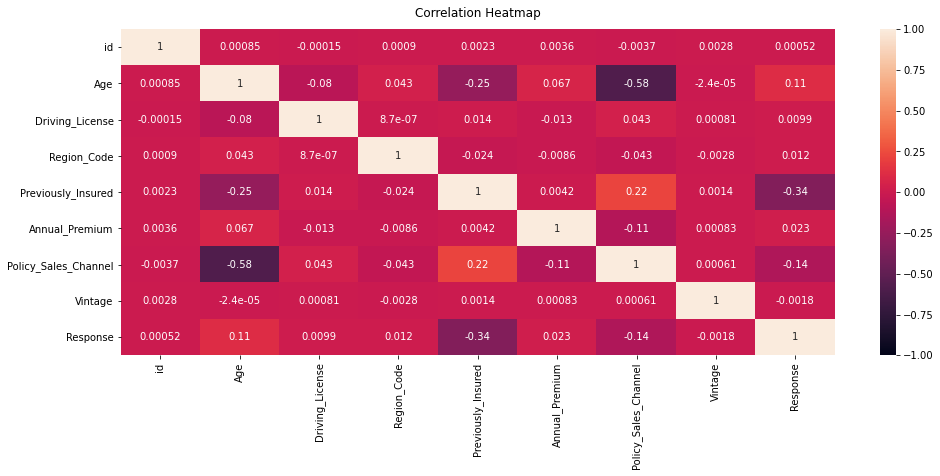

In [8]:
#plot correlation matrix
plt.figure(figsize=(16,6))
ht=sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
ht.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The attributes that are highly correlated with "Response" are "Previously_Insured", Policy_Sales_Channel" and "Age", in that order.

<AxesSubplot:xlabel='Age', ylabel='Count'>

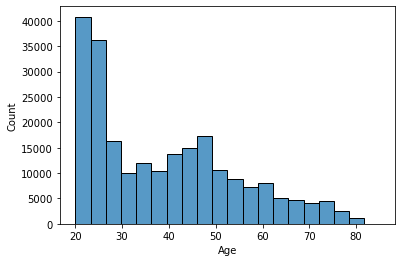

In [9]:
#plot distribution of age as an histogram
sns.histplot(x=train["Age"], bins=20)

From the graph above, the histogram of age is right skewed upon inspection.

<AxesSubplot:ylabel='Age'>

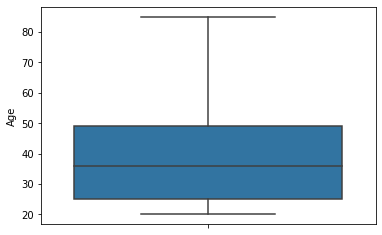

In [10]:
#plot distribution of annual premium as an histogram
sns.boxplot(y=train["Age"])

From the above boxplot, it can be seen that there are no outliers present in the Age distribution. 

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

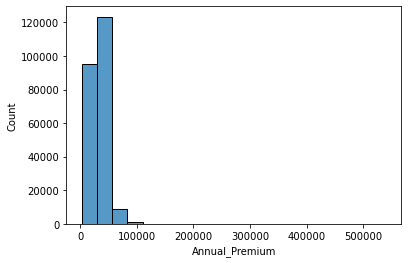

In [11]:
#plot distribution of annual premium as an histogram
sns.histplot(x=train["Annual_Premium"], bins=20)

The histogram for Annual Premium also shows that it is right skewed similar to age.

<AxesSubplot:ylabel='Annual_Premium'>

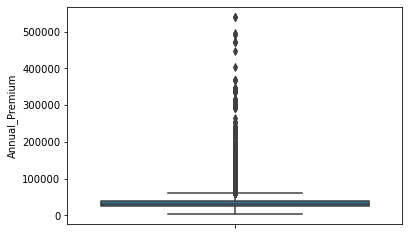

In [12]:
#plot distribution of annual premium as an histogram
sns.boxplot(y=train["Annual_Premium"])

From the above boxplot on Annual premium, it can be seen that there are a large number of outliers present in the annual premium distribution.

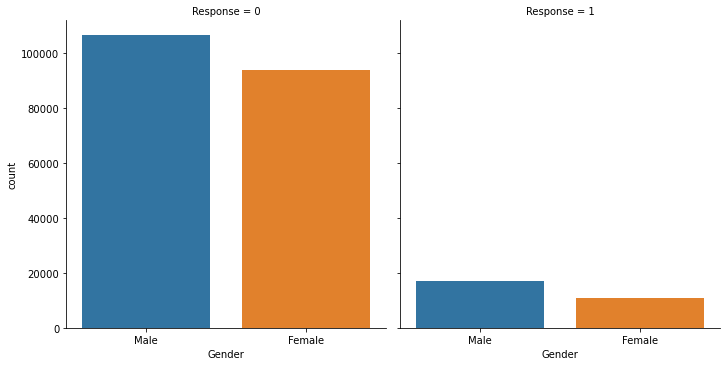

In [13]:
#plotting the distribution of gender based on customer's response
sns.catplot(x="Gender",  col="Response", kind="count", data=train)

From the graph above, it can be seen that there are more number of male customers in the dataset and also male customers are more interested in vehicle insurance than female customers.

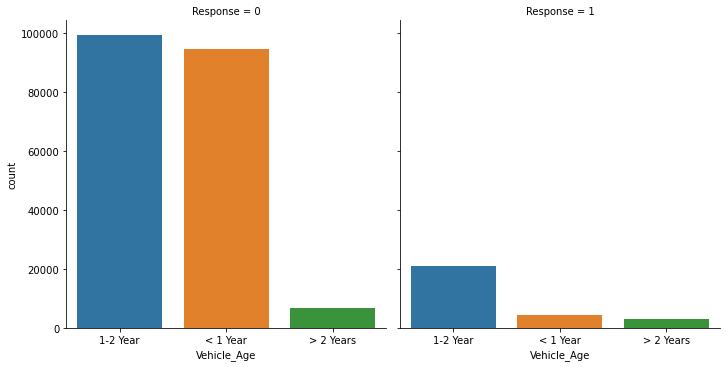

In [14]:
#plotting the distribution of vehicle age based on customer's response
sns.catplot(x="Vehicle_Age",  col="Response", kind="count", data=train)

The above graph describes the distribution of Vehicle Age among the customers in the dataset. It can be seen that there are more number of customers with vehicles with 1-2 years old and less than 1 year old. The customers with vehicles greater than 2 years are significantly less. The same trend follows with the customers who responded saying that they would be interested in vehicle insurance. 

In [15]:
#total number of responses under each category in vehicle age
train['Vehicle_Age'].value_counts()

1-2 Year     120131
< 1 Year      98879
> 2 Years      9655
Name: Vehicle_Age, dtype: int64

From the above values, it can be seen that the customers with vehicles more than 2 years old are significantly less.

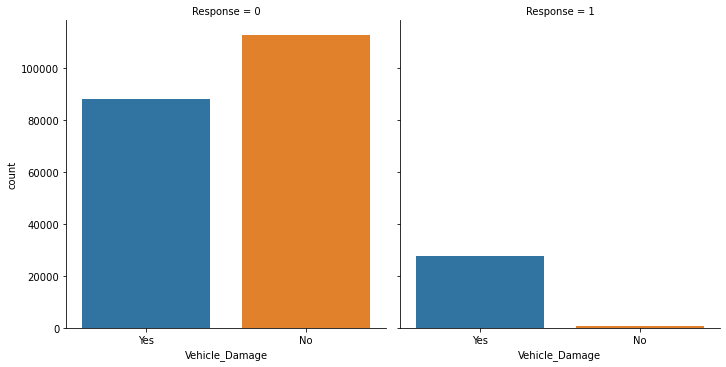

In [16]:
#plotting the distribution of vehicle damage based on customer's response
sns.catplot(x="Vehicle_Damage",  col="Response", kind="count", data=train)

The above graph describes the number of customers that have had their vehicle damaged.

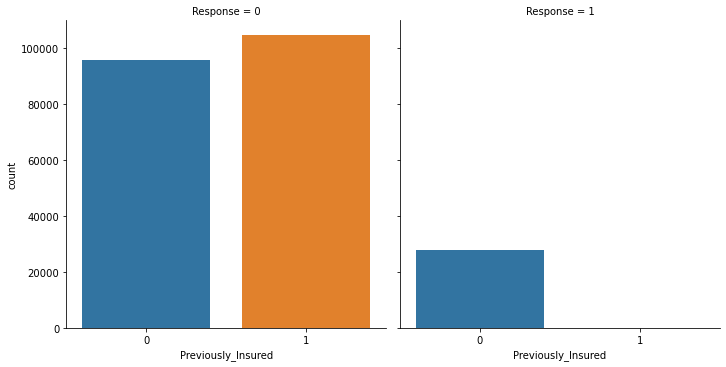

In [17]:
#plotting the distribution of previosuly owned vehicle insurance based on customer's response
sns.catplot(x="Previously_Insured",  col="Response", kind="count", data=train)

The above graph illustrates the number of customers in the dataset who already have a vehilce insurance. It can be seen that there are more customers in total who do not already have a vehicle insurance. Looking at the case of customers who are interested in a vehicle insurance, it is evident that customers who do not already own a vehicle insurance are more interested in getting a vehicle insurance.

# 3. Data Cleaning and Transformation

From the analysis in previous sections, there are no missing values in the dataset. Therefore, the only datapreprocessing steps that needs to be taken care of is dropping the id column, data transformation of right skewed columns (Age and Annual_Premium), the removal of outliers and data scaling of the continuous variables in both train and test dataset.

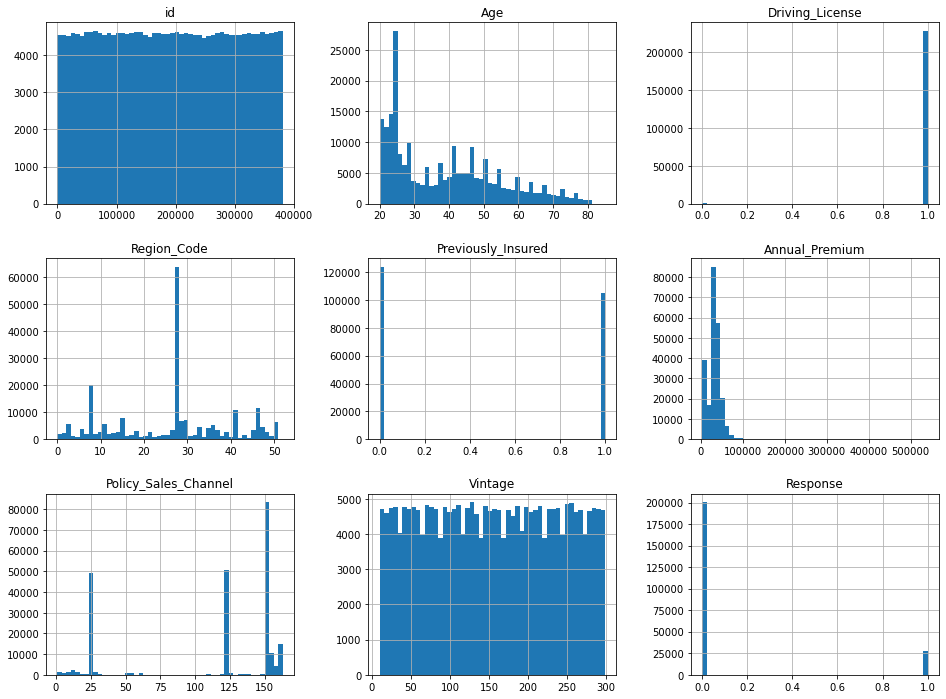

In [18]:
#display all numerical values in an histogram
dummy = train.hist(bins=50, figsize=(16,12))

In [19]:
#drop the id-column in the train dataset
train = train.drop(['id'], axis = 1)

In [20]:
#drop the id-column in the test dataset
test = test.drop(['id'], axis = 1)

In [21]:
#changing categorical variables to numerical
train.loc[train['Gender'] == 'Male', 'Gender'] = 1
train.loc[train['Gender'] == 'Female', 'Gender'] = 0
test.loc[test['Gender'] == 'Male', 'Gender'] = 1
test.loc[test['Gender'] == 'Female', 'Gender'] = 0

train.loc[train['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train.loc[train['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train.loc[train['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
test.loc[test['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test.loc[test['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test.loc[test['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

train.loc[train['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train.loc[train['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test.loc[test['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test.loc[test['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [22]:
#changing all the dtypes to int in train dataset
for col in train.columns:
    train[col] = train[col].astype(np.int32)

In [23]:
#changing all the dtypes to int in test dataset
for col in test.columns:
    test[col] = test[col].astype(np.int32)

In [24]:
#log transformation of Age column
train['Age_log'] = np.log(train['Age'])

<AxesSubplot:xlabel='Age_log', ylabel='Count'>

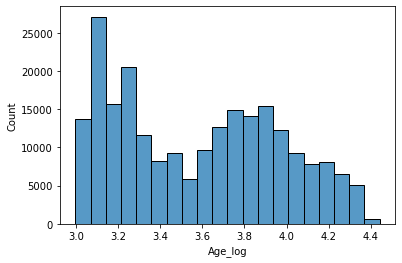

In [25]:
#plot distribution of Age after log transformation in an histogram
sns.histplot(x=train["Age_log"], bins=20)

In [26]:
#log transformation of Age column in the test dataset
test['Age_log'] = np.log(test['Age'])

In [27]:
#log transformation of Annual_Premium column in train dataset
train['Annual_Premium_log'] = np.log(train['Annual_Premium'])

<AxesSubplot:xlabel='Annual_Premium_log', ylabel='Count'>

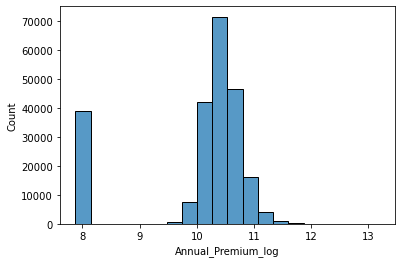

In [28]:
#plot distribution of Annual_Premium after log transformation in an histogram
sns.histplot(x=train["Annual_Premium_log"], bins=20)

In [29]:
#removing outliers from Annual_Premium_log using z_score
from scipy import stats
train['z_score']=stats.zscore(train['Annual_Premium_log'])

<AxesSubplot:xlabel='z_score', ylabel='Count'>

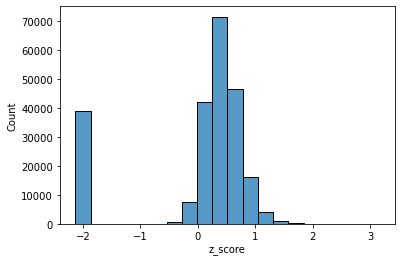

In [30]:
#checking the distribution of z_score so that values with high z_score can be removed
sns.histplot(x=train['z_score'], bins=20)

In [31]:
#removing values with z_score greater than 2
train = train.loc[train['z_score']<=2]

In [32]:
#removing values with z_score lesser than -1
train = train.loc[train['z_score']>=-1]

<AxesSubplot:xlabel='Annual_Premium_log', ylabel='Count'>

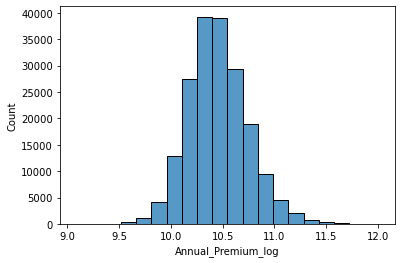

In [33]:
#plot distribution of Annual_Premium after removal of outliers in an histogram
sns.histplot(x=train["Annual_Premium_log"], bins=20)

In [34]:
#log transformation of Annual_Premium column in the test dataset
test['Annual_Premium_log'] = np.log(test['Annual_Premium'])

In [35]:
#drop the age column in test and train dataset
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [36]:
#drop the Annual_Premium column from the train and test dataset
train = train.drop(['Annual_Premium'], axis = 1)
test = test.drop(['Annual_Premium'], axis = 1)

In [37]:
#drop the z_score column from train dataset
train = train.drop(['z_score'], axis = 1)

In [38]:
#data scaling needs to be done for both train and test dataset using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_target = train['Response'].values
train_predictors = train.drop(['Response'], axis=1)

#fit_transform returns a NumPy aray, so need to put it back 
#into a Pandas dataframe
scaled_vals = scaler.fit_transform(train_predictors)
train = pd.DataFrame(scaled_vals, columns=train_predictors.columns)

#put the non-scaled target back in
train['Response'] = train_target

In [39]:
#repeat the same steps for the test dataset
test_target = test['Response'].values
test_predictors = test.drop(['Response'], axis=1)

scaled_vals = scaler.fit_transform(test_predictors)
test = pd.DataFrame(scaled_vals, columns=test_predictors.columns)

test['Response'] = test_target

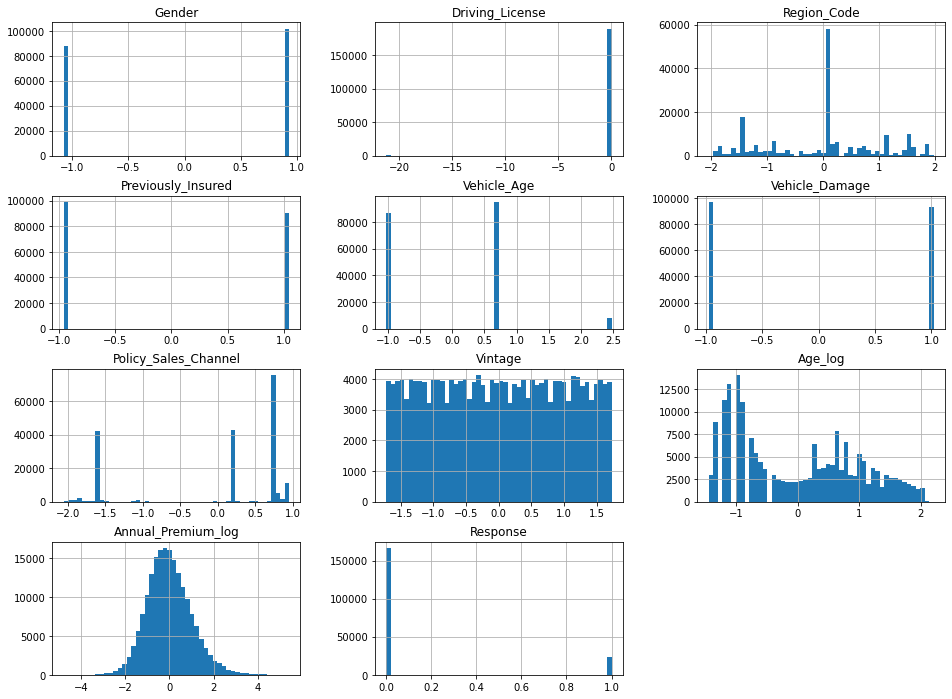

In [40]:
#plotting all the distribution of values in each column after data-preprocesing
dummy = train.hist(bins=50, figsize=(16,12))

The train and test dataset is now clean and ready to be used for modeling the predictive models which wil be done in the predictivemodels report.

In [43]:
train.to_csv('train.csv', index=False)

In [44]:
test.to_csv('test.csv', index=False)